In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install gdown
import gdown
url = "https://drive.google.com/uc?id=16hOWSbMpqJfpObMTs1rzCyWYabRw6Vd8"
output = "Teeth_Dataset.zip"
gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=16hOWSbMpqJfpObMTs1rzCyWYabRw6Vd8
From (redirected): https://drive.google.com/uc?id=16hOWSbMpqJfpObMTs1rzCyWYabRw6Vd8&confirm=t&uuid=0790f04a-4b17-4d1d-b7d7-e5135201eda7
To: /content/Teeth_Dataset.zip
100%|██████████| 49.1M/49.1M [00:01<00:00, 45.2MB/s]


'Teeth_Dataset.zip'

In [6]:
import zipfile
with zipfile.ZipFile("Teeth_Dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("Teeth_Dataset")
import os
print("Teeth_Dataset:")
print(os.listdir("Teeth_Dataset"))


Teeth_Dataset:
['Teeth_Dataset']


In [7]:
import os
inner_path = "Teeth_Dataset/Teeth_Dataset"
print("Teeth_Dataset/Teeth_Dataset:")
print(os.listdir(inner_path))


Teeth_Dataset/Teeth_Dataset:
['Testing', 'Validation', 'Training']


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import seaborn as sns

In [9]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    brightness_range=[0.8,1.2],
    horizontal_flip=True,
    fill_mode='nearest'
  )
train_generator=train_datagen.flow_from_directory(
    "Teeth_Dataset/Teeth_Dataset/Training",
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)
val_datagen=ImageDataGenerator(rescale=1./255)
val_generator=val_datagen.flow_from_directory(
    "Teeth_Dataset/Teeth_Dataset/Validation",
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 3087 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.


In [10]:
print(os.listdir("/content/drive/MyDrive/Teeth DataSet/Teeth_Dataset/Testing"))
test_datagen=ImageDataGenerator(rescale=1./255)
test_generator=test_datagen.flow_from_directory(
    "/content/drive/MyDrive/Teeth DataSet/Teeth_Dataset/Testing",
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

['MC', 'OLP', 'Gum', 'CoS', 'OT', 'CaS', 'OC']
Found 1028 images belonging to 7 classes.


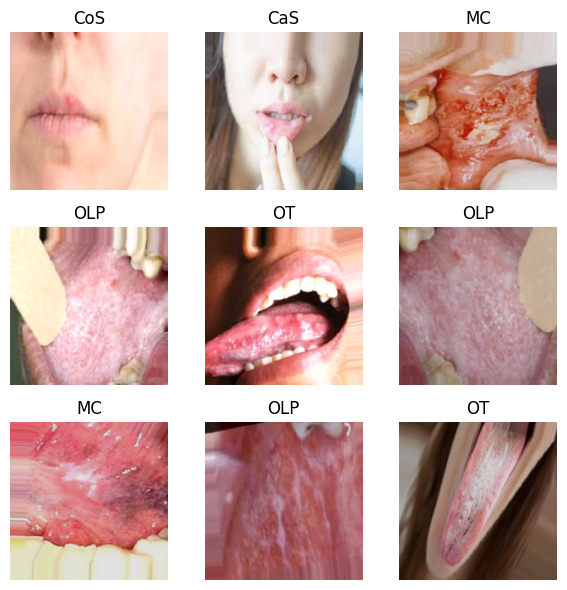

In [11]:
images,labels=next(train_generator)
plt.figure(figsize=(6,6))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(images[i])
  class_index=np.argmax(labels[i])
  class_name=list(train_generator.class_indices.keys())[class_index]
  plt.title(class_name)
  plt.axis("off")
plt.tight_layout()
plt.show()

In [12]:
from tensorflow.keras.applications import MobileNetV2
base_model = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = True
for layer in base_model.layers[:-30]:
    layer.trainable = False

x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(128, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)
output = layers.Dense(7, activation='softmax')(x)

model = models.Model(inputs=base_model.input, outputs=output)
model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,423,367 (9.24 MB)

 Trainable params: 1,691,527 (6.45 MB)

 Non-trainable params: 731,840 (2.79 MB)

In [13]:
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
early_stop=EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)
reduce_lr=ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-6
)
call_backs=[early_stop,reduce_lr]


In [15]:
history=model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15,
    callbacks=call_backs
)

Epoch 1/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 44s 458ms/step - accuracy: 0.8176 - loss: 0.5408 - val_accuracy: 0.4844 - val_loss: 2.1020 - learning_rate: 1.0000e-04
Epoch 2/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 44s 455ms/step - accuracy: 0.8674 - loss: 0.3940 - val_accuracy: 0.6051 - val_loss: 1.4338 - learning_rate: 1.0000e-04
Epoch 3/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 45s 463ms/step - accuracy: 0.9020 - loss: 0.2898 - val_accuracy: 0.6702 - val_loss: 1.0723 - learning_rate: 1.0000e-04
Epoch 4/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 46s 467ms/step - accuracy: 0.9357 - loss: 0.2119 - val_accuracy: 0.7354 - val_loss: 0.8501 - learning_rate: 1.0000e-04
Epoch 5/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 44s 457ms/step - accuracy: 0.9535 - loss: 0.1505 - val_accuracy: 0.8521 - val_loss: 0.4491 - learning_rate: 1.0000e-04
Epoch 6/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 46s 470ms/step - accuracy: 0.9601 - loss: 0.1347 - val_accuracy: 0.8677 - val_loss: 0.4042 - learning_rate: 1.0000e-04
Epoch 7/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 81s 459ms/step - acc

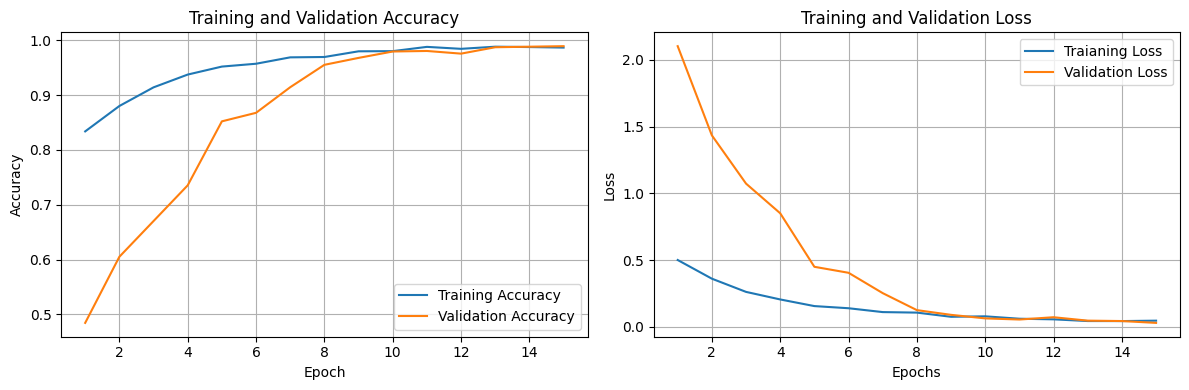

In [16]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs_range=range(1,len(acc)+1)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Traianing Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
test_loss,test_acc=model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc: .2f}")


33/33 ━━━━━━━━━━━━━━━━━━━━ 366s 11s/step - accuracy: 0.9930 - loss: 0.0219
Test Accuracy:  0.99


In [18]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred=model.predict(test_generator)
y_pred_classes=np.argmax(y_pred,axis=1)
y_true=test_generator.classes
print(classification_report(y_true,y_pred_classes,target_names=list(test_generator.class_indices.keys())))

33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 226ms/step
              precision    recall  f1-score   support

         CaS       0.95      1.00      0.97       160
         CoS       1.00      1.00      1.00       149
         Gum       1.00      0.98      0.99       120
          MC       0.99      0.97      0.98       180
          OC       0.97      0.98      0.98       108
         OLP       1.00      0.98      0.99       180
          OT       1.00      1.00      1.00       131

    accuracy                           0.99      1028
   macro avg       0.99      0.99      0.99      1028
weighted avg       0.99      0.99      0.99      1028



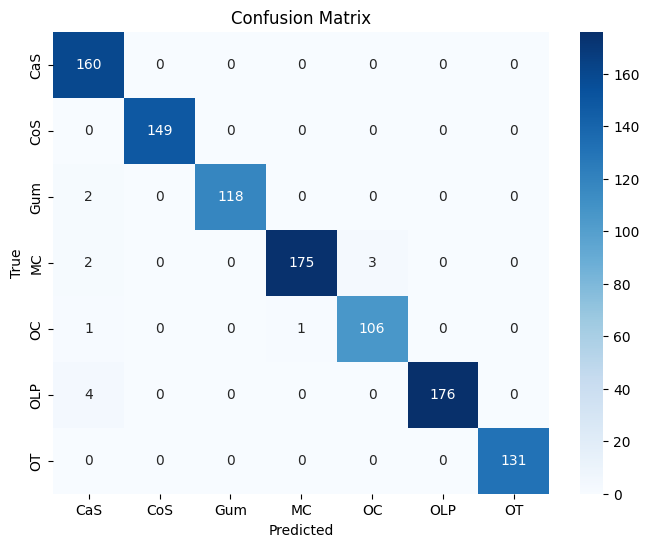

In [19]:
cm=confusion_matrix(y_true,y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues",xticklabels=test_generator.class_indices.keys(),yticklabels=test_generator.class_indices.keys())
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [21]:
model.export("SavedModel_format")

Saved artifact at 'SavedModel_format'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  132041141969808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132041141970384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132041141973648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132041141973264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132041141972112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132041141973840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132041141972880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132041141960784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132041141974032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132041141971536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1320411419744

In [22]:
import shutil
shutil.make_archive('SavedModel_format', 'zip', 'SavedModel_format')


'/content/SavedModel_format.zip'

In [23]:
from google.colab import files
files.download("SavedModel_format.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>